#Implementing Feedforward neural networks with Keras and TensorFlow 
#a. Import the necessary packages 
#b. Load the training and testing data (MNIST/CIFAR10) 
#c. Define the network architecture using Keras 
#d. Train the model using SGD 
#e. Evaluate the network 
#f. Plot the training loss and accuracy 


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import warnings

In [2]:
#pip install tenserflow

In [3]:
from tensorflow import keras

In [4]:
from keras.datasets import mnist

In [5]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()


x_train = x_train / 255
x_test = x_test /255


In [6]:
print(f"Shape of X_train{x_train.shape}")
print(f"Shape of Y_train{y_train.shape}")
print(f"Shape of X_test{x_test.shape}")
print(f"Shape of Y_train{y_test.shape}")

Shape of X_train(60000, 28, 28)
Shape of Y_train(60000,)
Shape of X_test(10000, 28, 28)
Shape of Y_train(10000,)


5


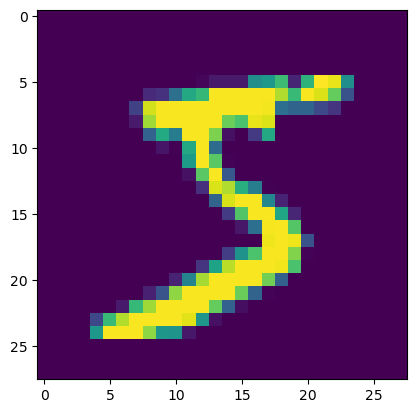

In [7]:
#optional steps 
plt.imshow(x_train[0])
print(y_train[0])

In [8]:
#Define the network architecture

In [9]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu',name='L1'),#128 stands for neural networks
    keras.layers.Dense(10,activation='softmax',name='L2')
    
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 128)               100480    
                                                                 
 L2 (Dense)                  (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
#train the model using SGD

In [14]:
model.compile(optimizer="sgd",
             loss="sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [15]:
# Trainig the model
history=model.fit(x_train,y_train,
                  epochs=10,
validation_data=(x_test,y_test),
shuffle=True)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1555 - accuracy: 0.9568 - val_loss: 0.1536 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1476 - accuracy: 0.9592 - val_loss: 0.1496 - val_accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1408 - accuracy: 0.9609 - val_loss: 0.1412 - val_accuracy: 0.9585
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1346 - accuracy: 0.9627 - val_loss: 0.1367 - val_accuracy: 0.9602
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1287 - accuracy: 0.9640 - val_loss: 0.1318 - val_accuracy: 0.9623
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1233 - accuracy: 0.9651 - val_loss: 0.1273 - val_accuracy: 0.9635
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1184 - accuracy: 0.9676 - val_loss: 0.1246 - val_accuracy:

In [23]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Loss=%0.3f'%(test_loss*100))
print('Accuracy=%0.3f'%(test_acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.1149 - accuracy: 0.9669
Loss=11.486
Accuracy=96.690


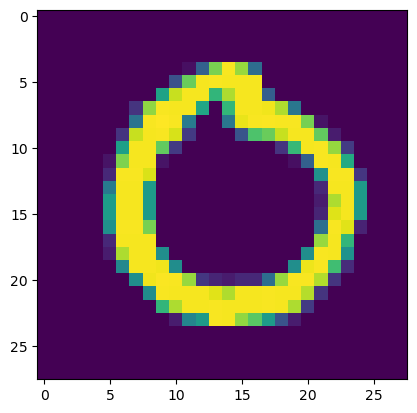

313/313 [==============================] - 1s 2ms/step


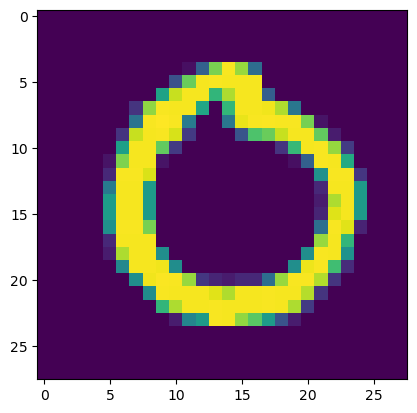

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [18]:
print('Predicted Value: ', predicted_value[n])

Predicted Value:  [9.9998736e-01 3.8536321e-09 1.0272871e-05 3.1751645e-07 2.9310671e-10
 7.9950001e-07 1.8467657e-07 4.4601681e-08 6.1921673e-07 3.9698975e-07]


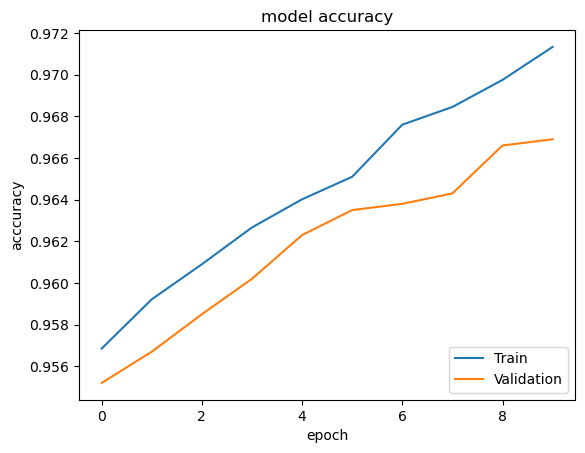

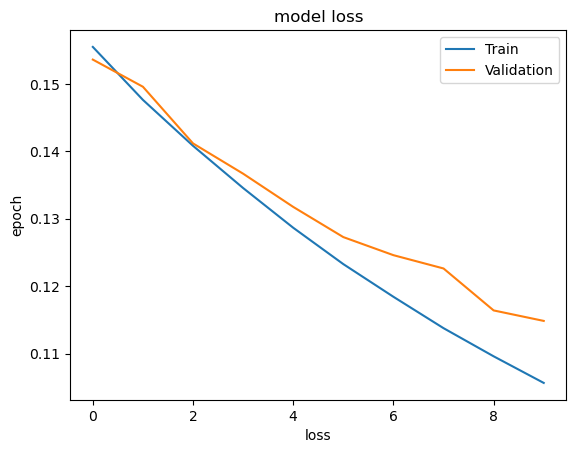

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acccuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('epoch')
plt.xlabel('loss')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()